In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression 


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv(r'C:\Users\user\Downloads\house price prediction\train.csv')

In [5]:
df.shape

(1460, 81)

In [6]:
df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [7]:
df.tail(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1458             5        Typ           0         NaN     Attchd       1950.0   
1459             6        Typ           0         NaN     Attchd       1965.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1458          Unf           1         240         TA         TA          Y   
1459          Fin           1         276         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1458         366            0            112          0            0   
1459         736           68              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1458         0    NaN   NaN         NaN        0       4    2010       WD   
1459         0    NaN   NaN         NaN        0       6    2008       WD   

     SaleCondition  SalePrice  
1458        Normal     142125  
1459        Normal     147500

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [10]:
df.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

In [12]:
df.duplicated().sum()

0

In [13]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
print("count of numerical features = ",numerical_features.columns.size)
#categorical features
categorical_features = df.select_dtypes(include=['object'])
print("count of categorical features = ",categorical_features.columns.size)

count of numerical features =  38
count of categorical features =  43


In [15]:
column_value_counts = {}
# Iterate through each column and get the value counts
for column in df.columns:
    column_value_counts[column] = df[column].value_counts()
# Display the value counts for each column
for column, counts in column_value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print("-" * 40)

Column: Id
Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64
----------------------------------------
Column: MSSubClass
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
----------------------------------------
Column: MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
----------------------------------------
Column: LotFrontage
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
----------------------------------------
Column: LotArea
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601    

In [16]:
df_encoded = pd.get_dummies(df['Street'], drop_first=True)
df_combined = df.copy()
df_combined['Street_encoded'] = df_encoded
correlation = df_combined[['Street_encoded', 'SalePrice']].corr().iloc[0, 1]
correlation 

0.041035535500049444

Text(0.5, 1.0, 'Correlation of Numeric Features with SalePrice')

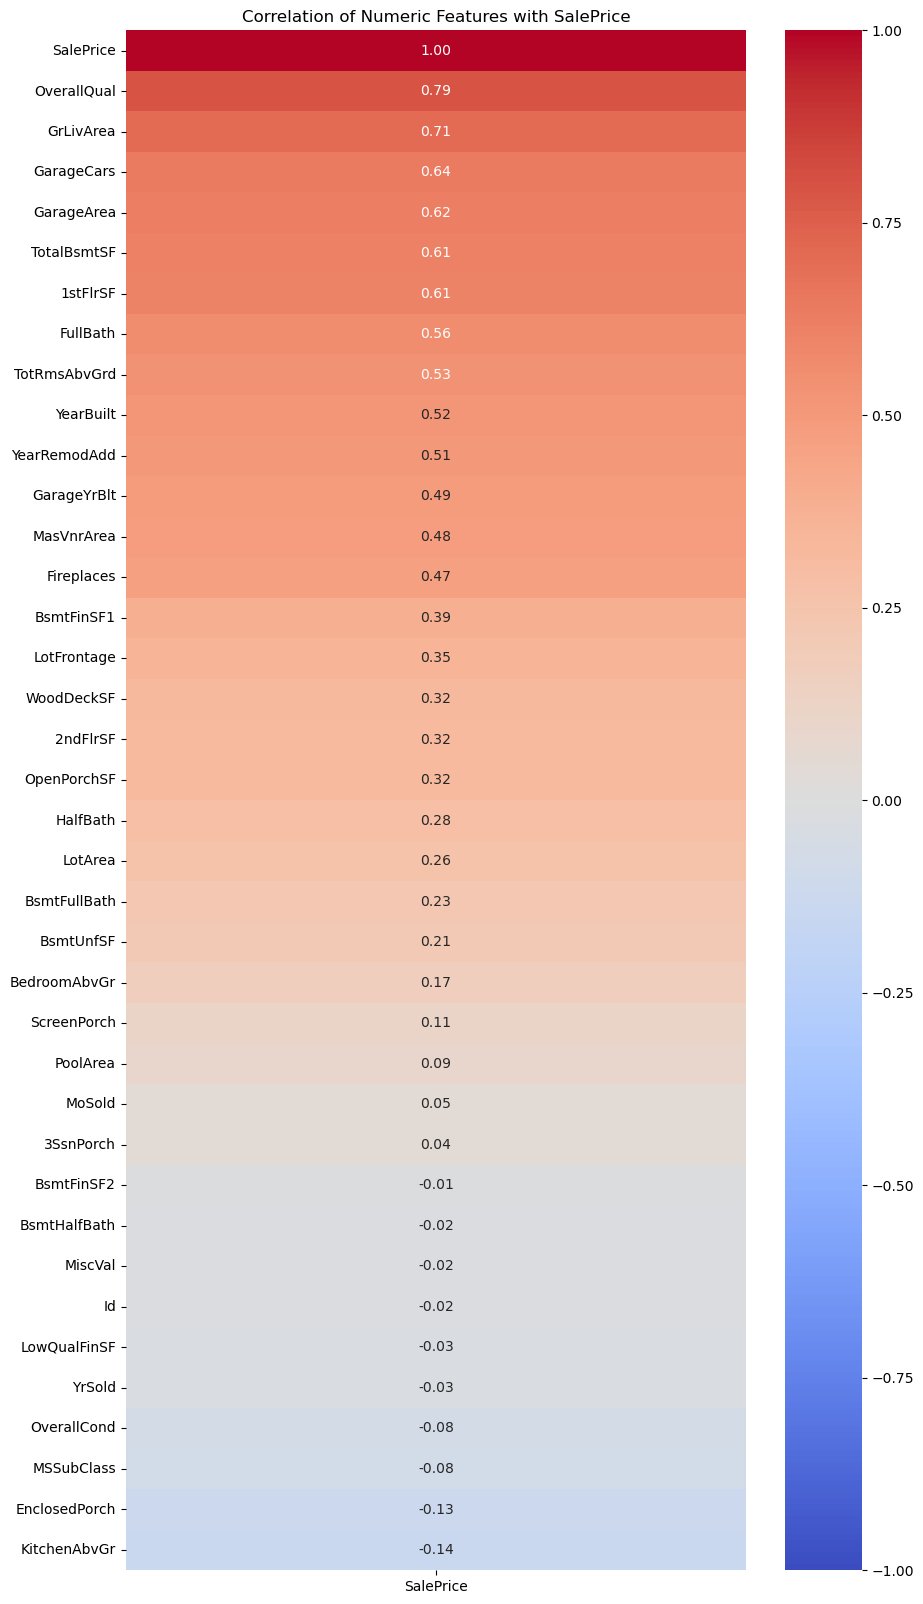

In [17]:
correlations = numerical_features.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
# Plot heatmap of correlations
plt.figure(figsize=(10, 20))
sns.heatmap(
    correlations,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.title('Correlation of Numeric Features with SalePrice')

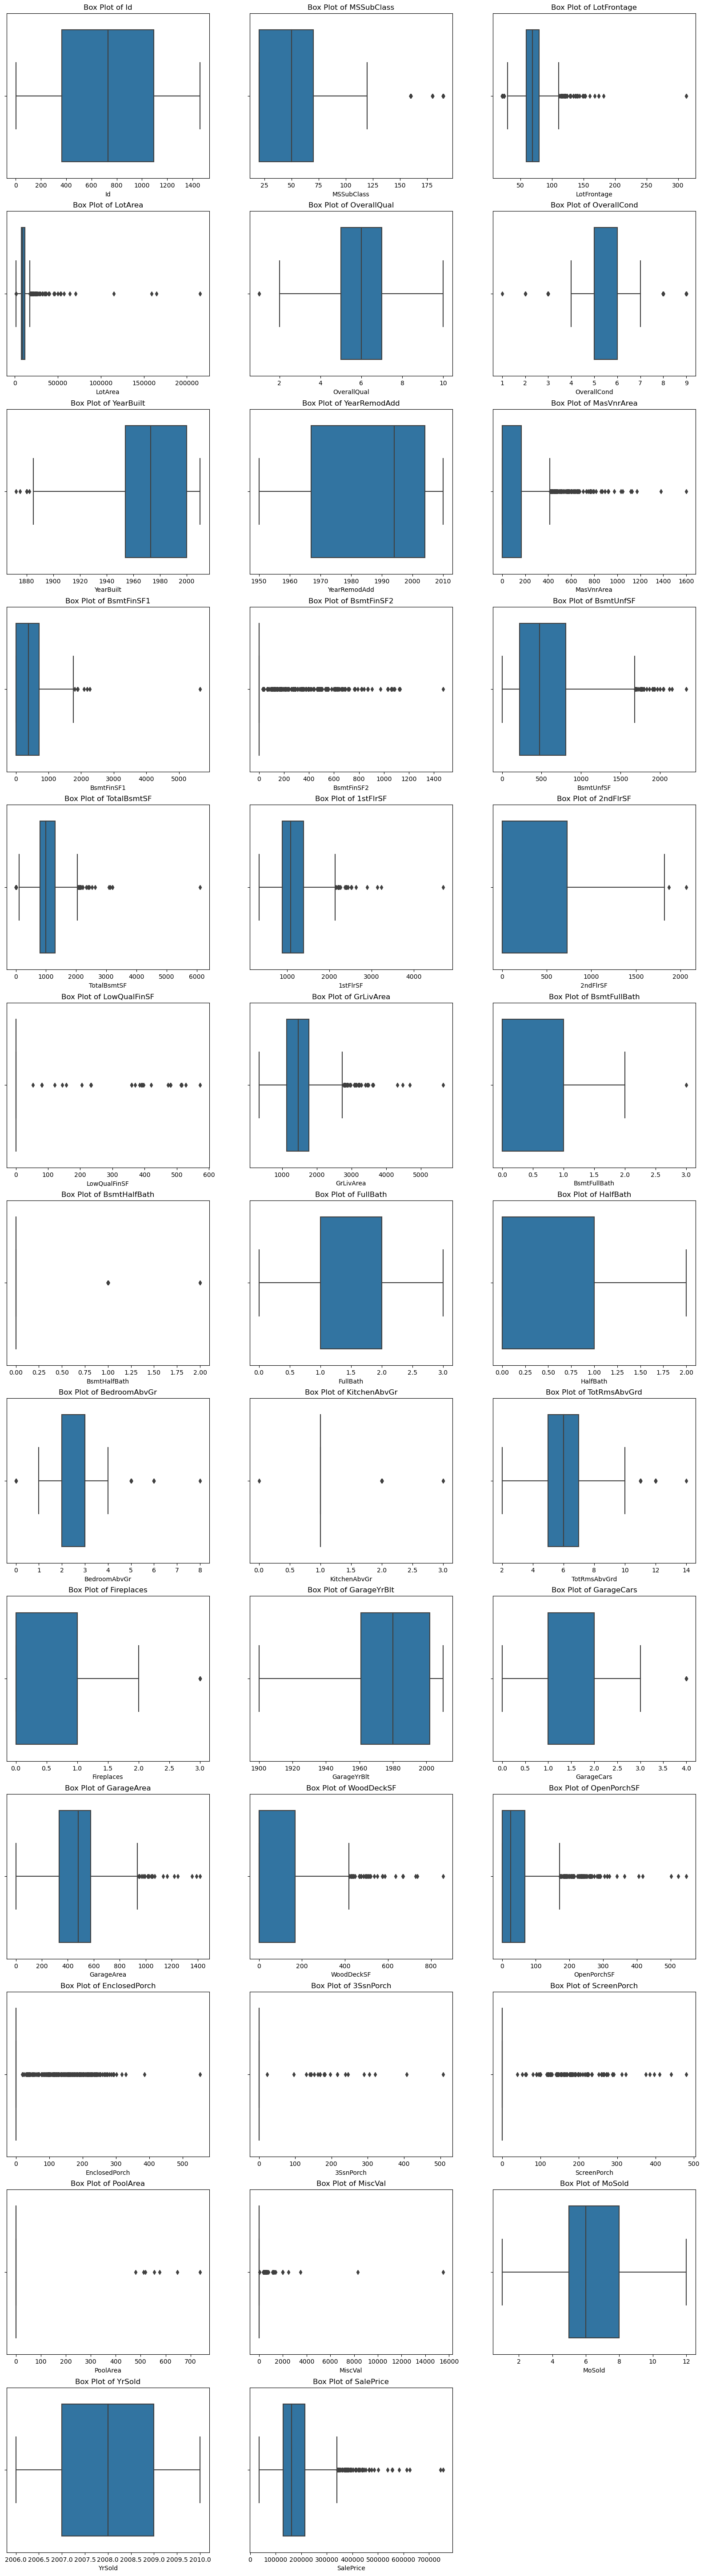

In [18]:
plt.figure(figsize=(20, 80))
for n, feature in enumerate(numerical_features):
    plt.subplot(14, 3, n + 1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10416\1379949409.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 4))


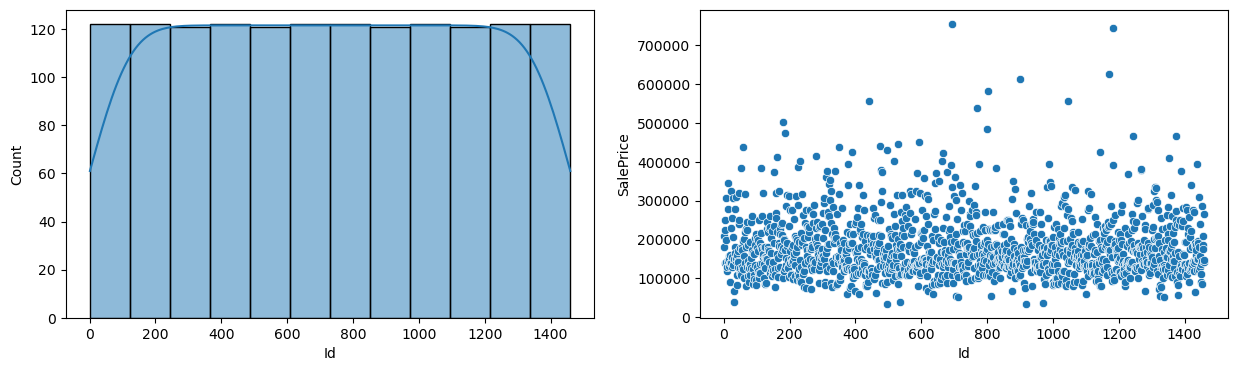

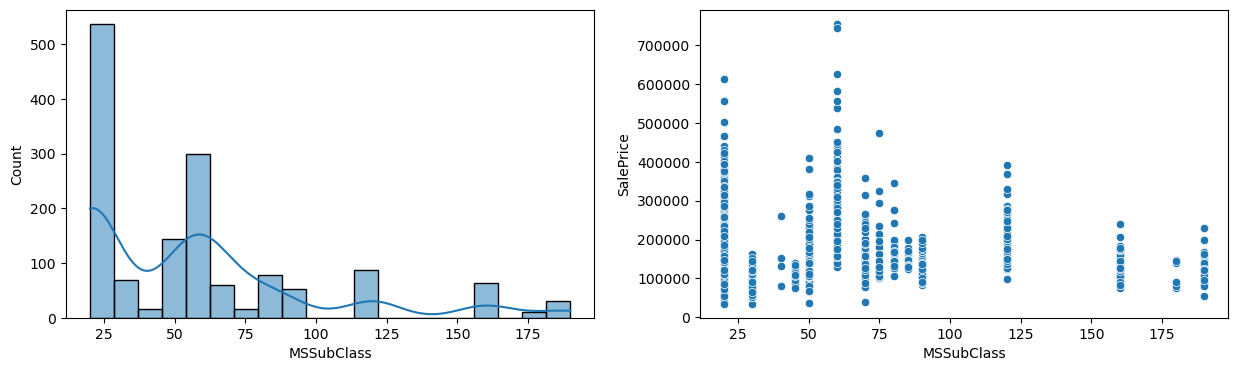

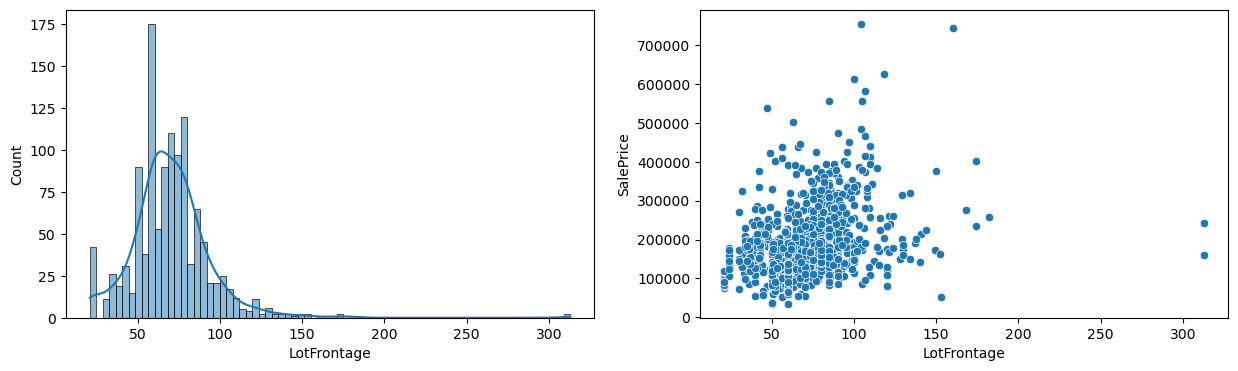

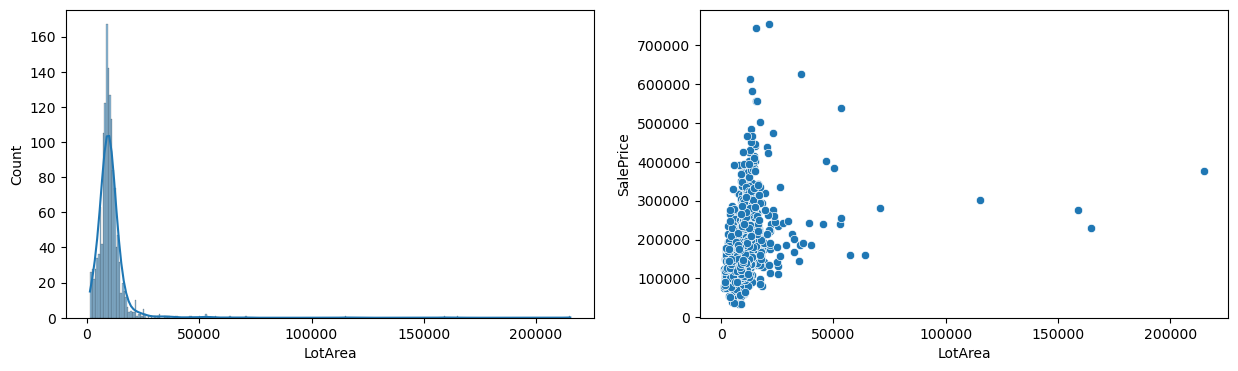

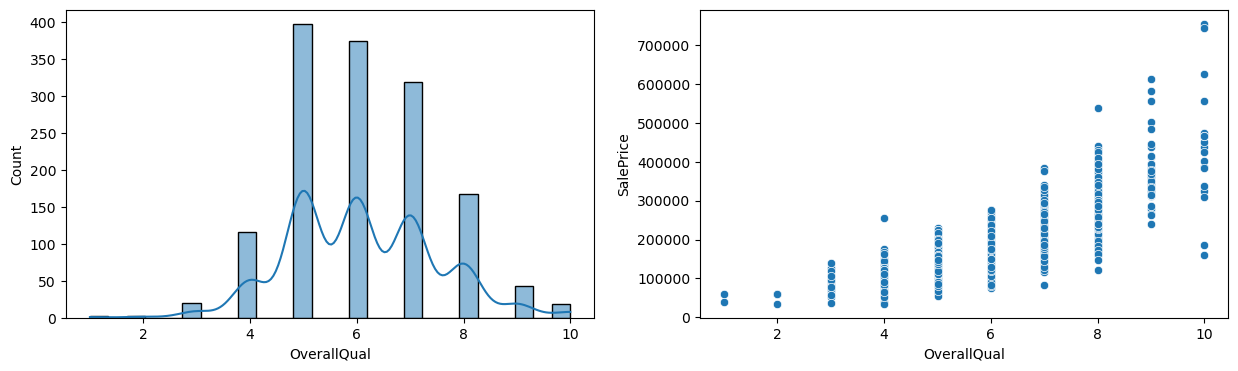

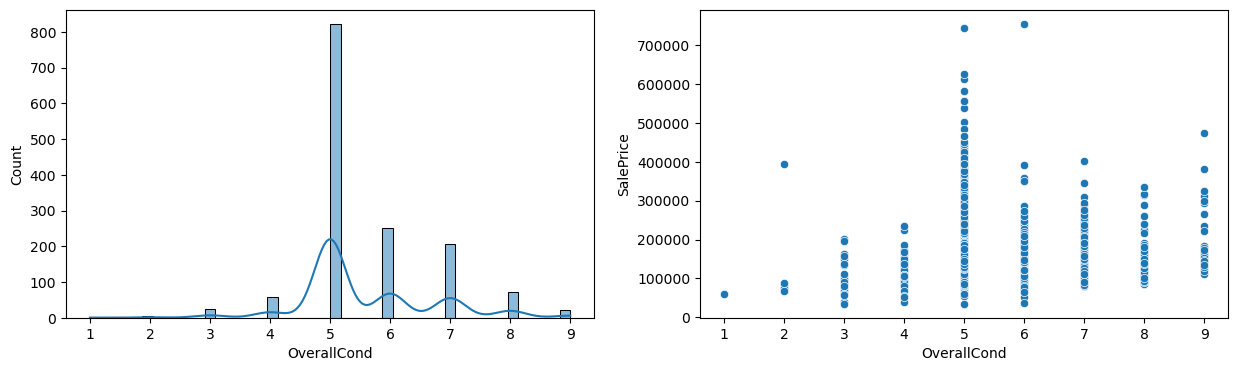

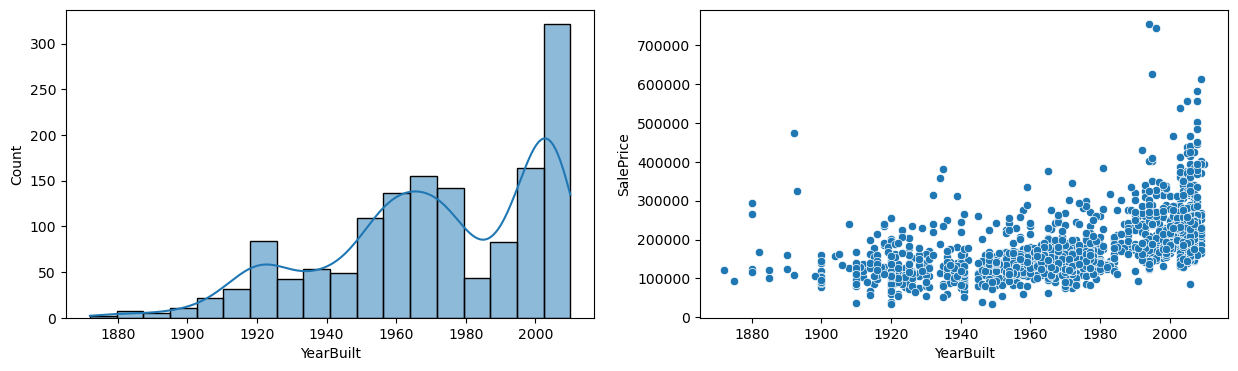

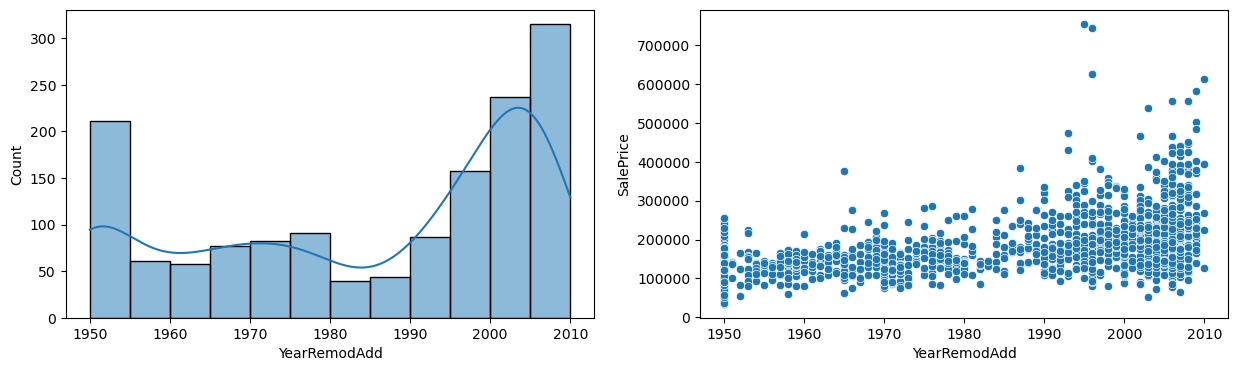

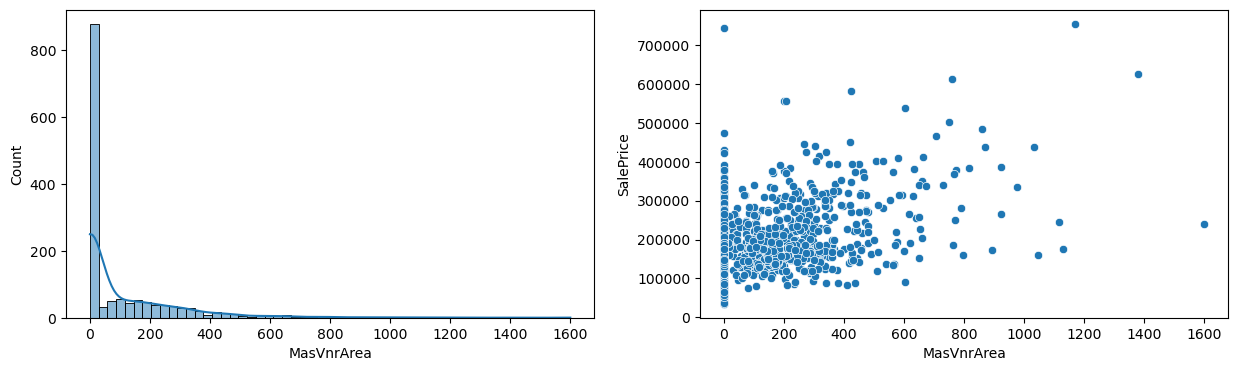

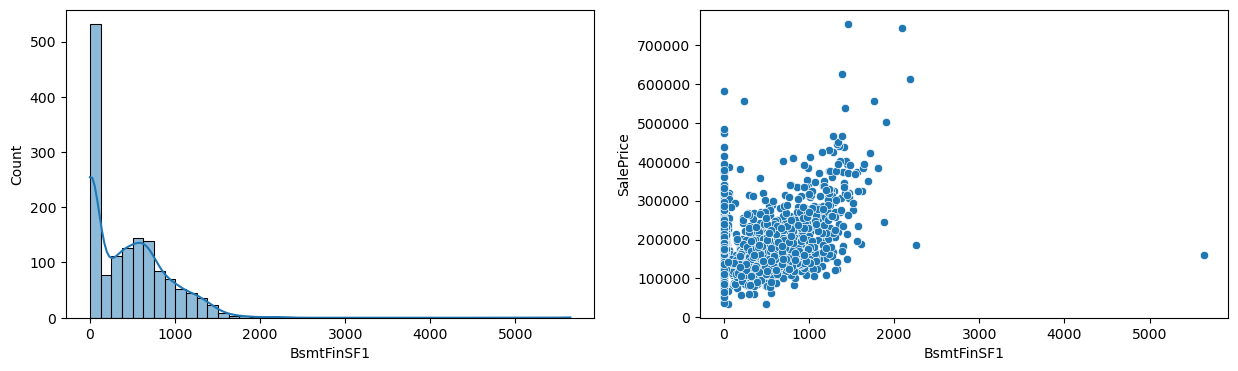

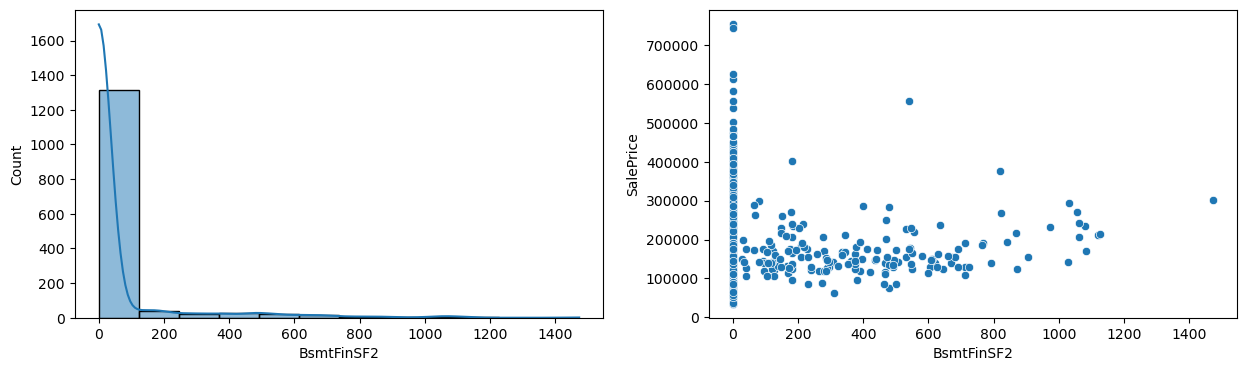

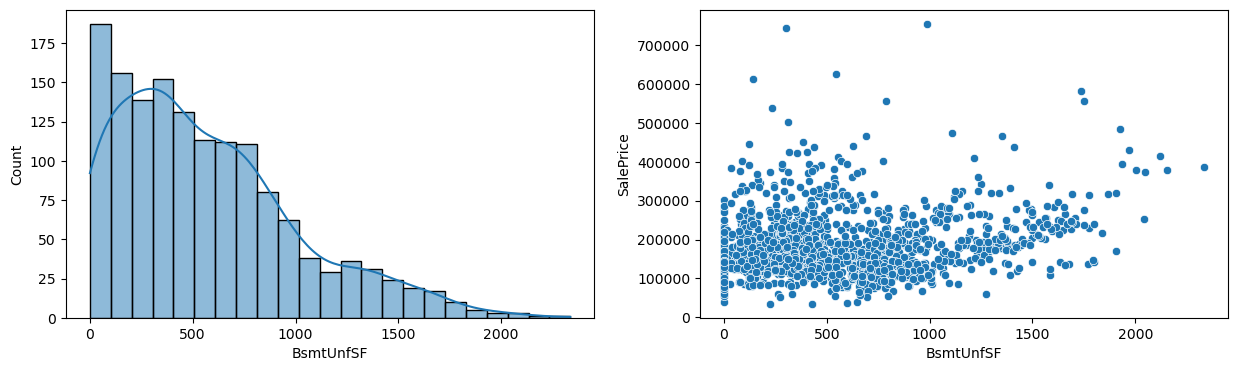

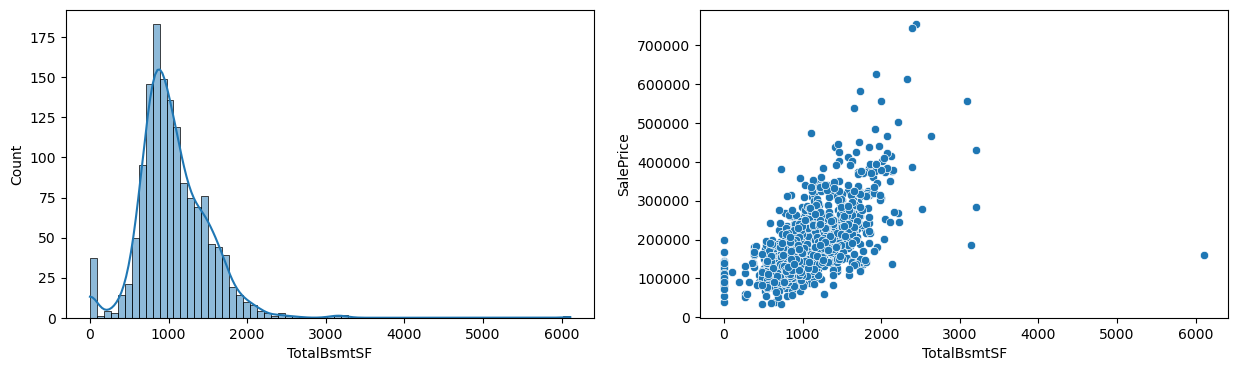

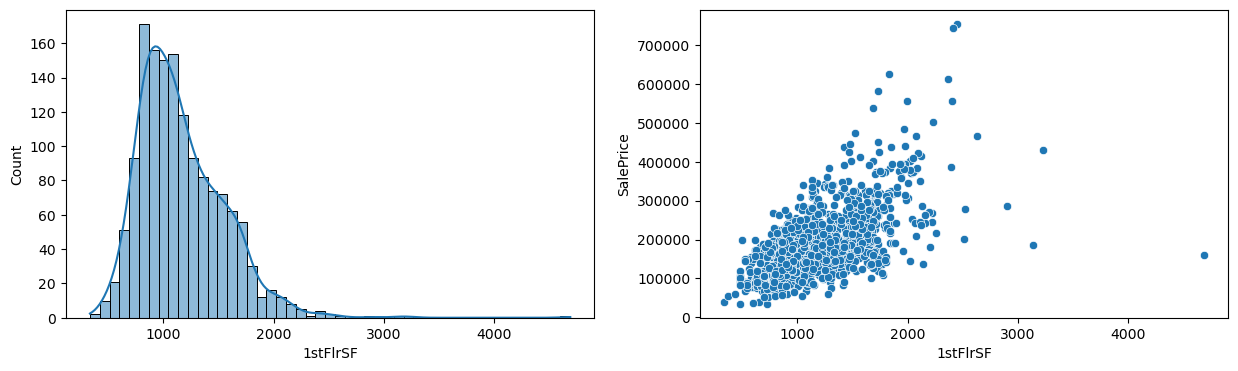

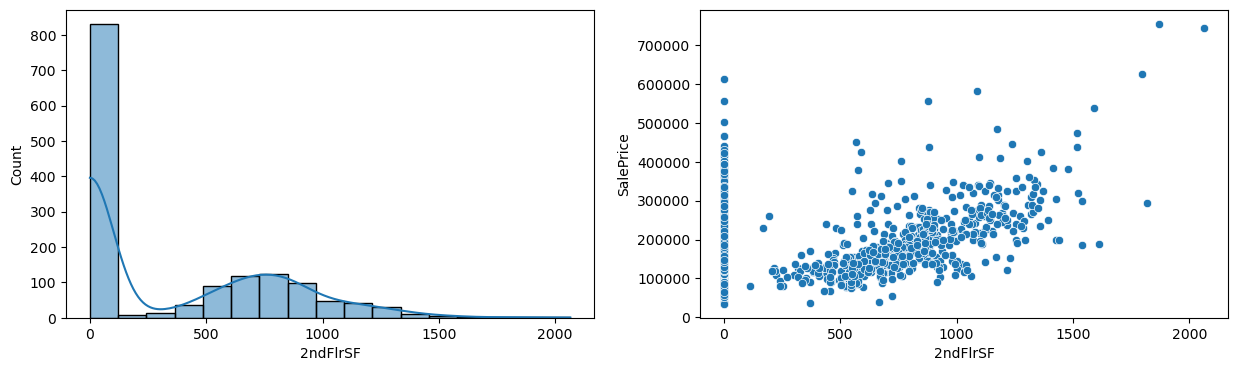

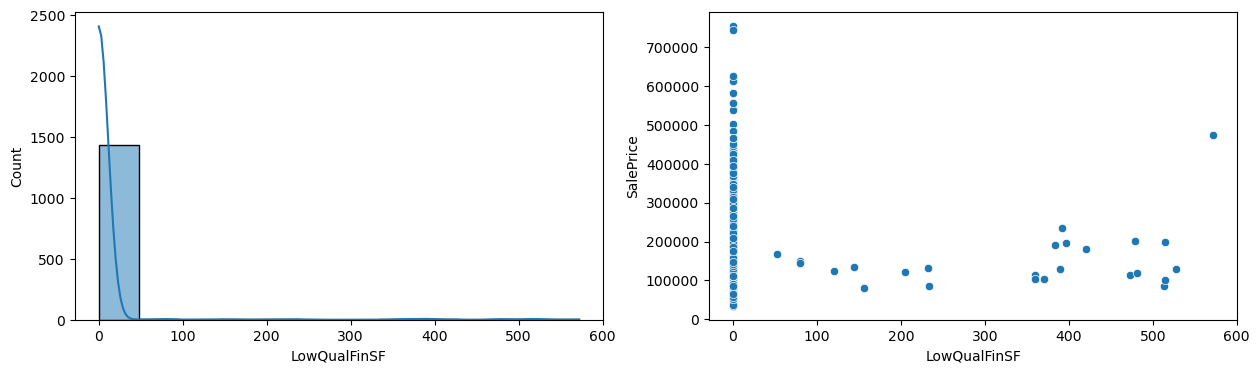

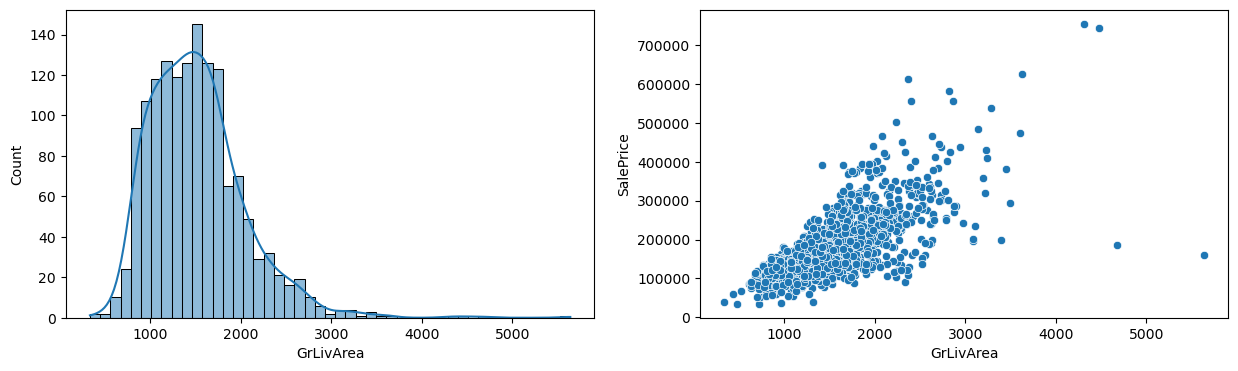

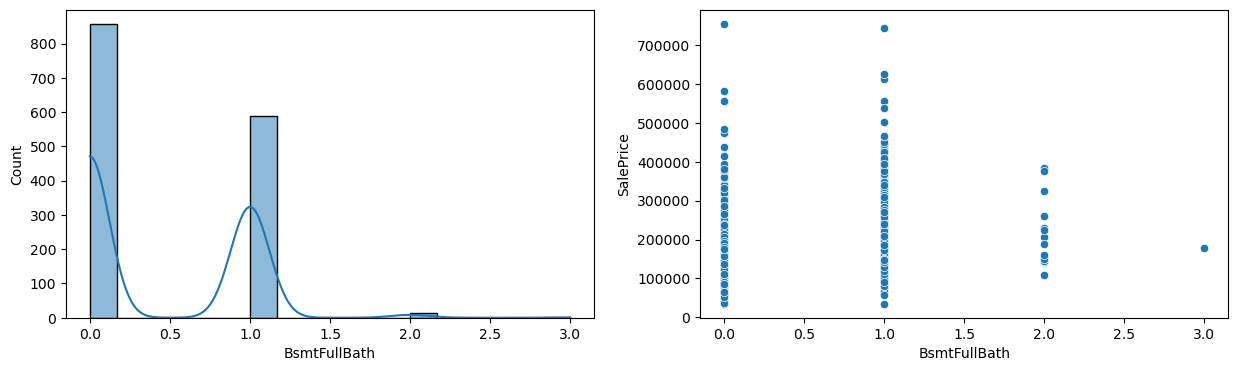

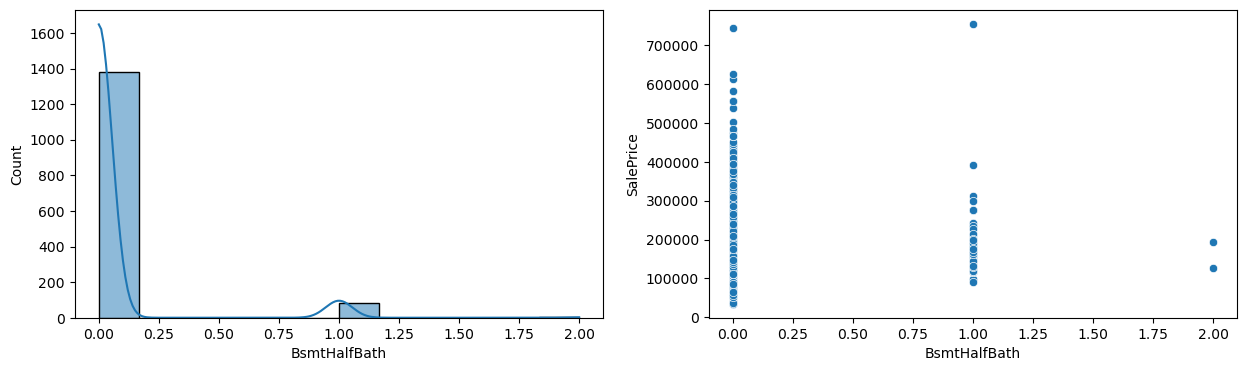

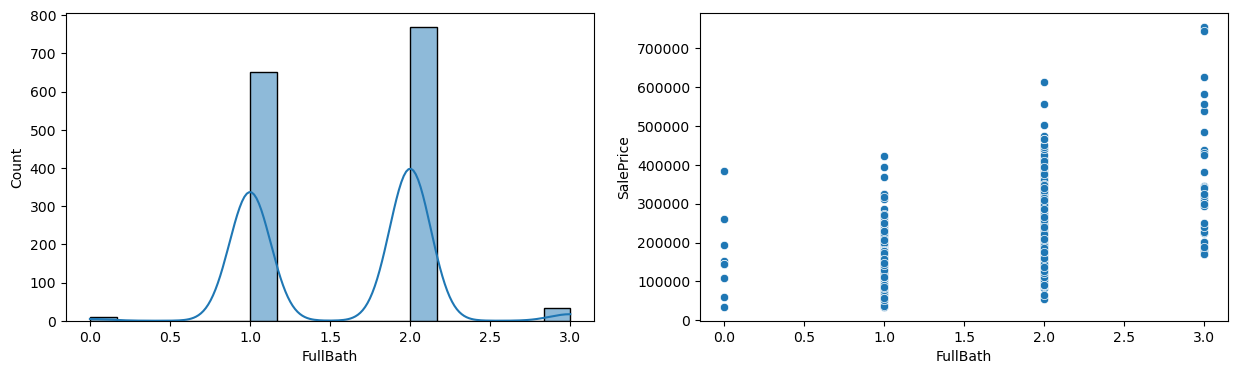

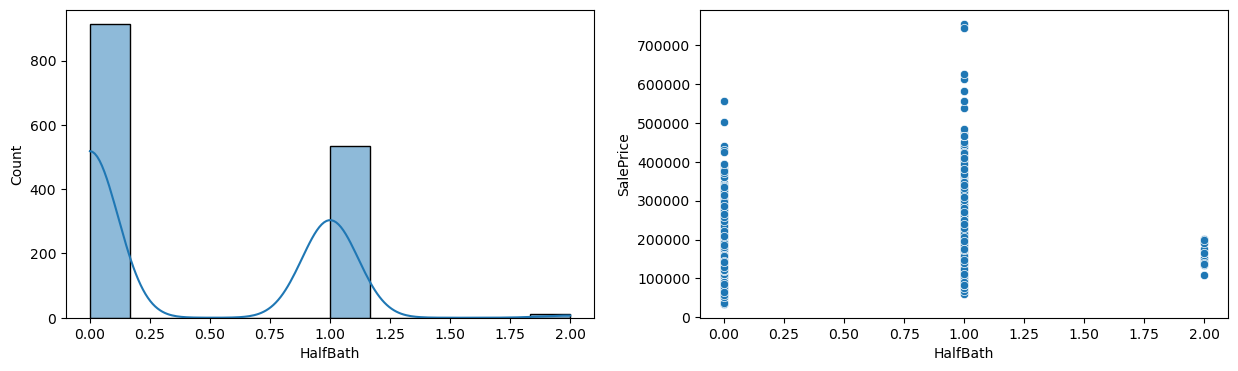

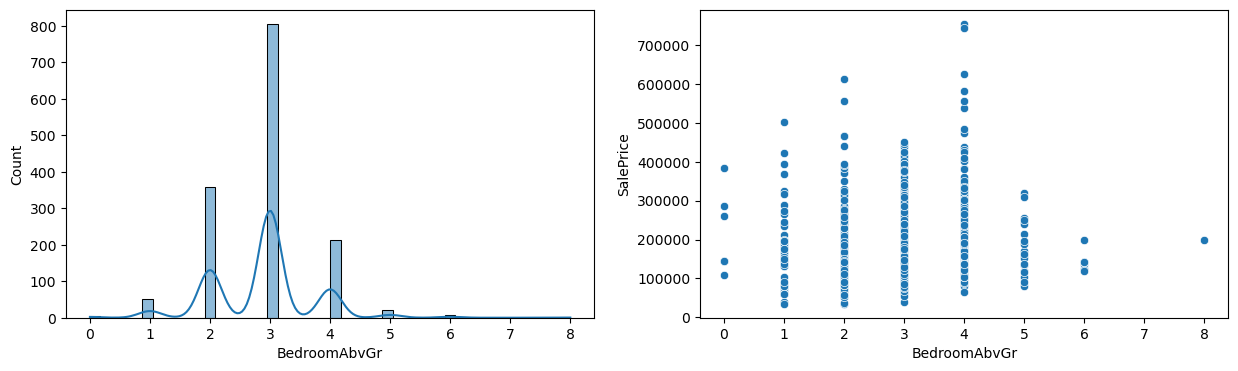

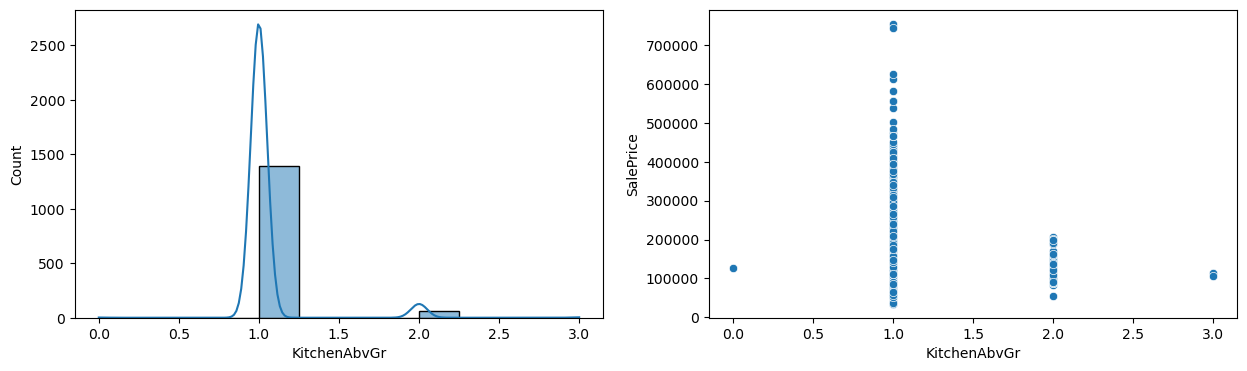

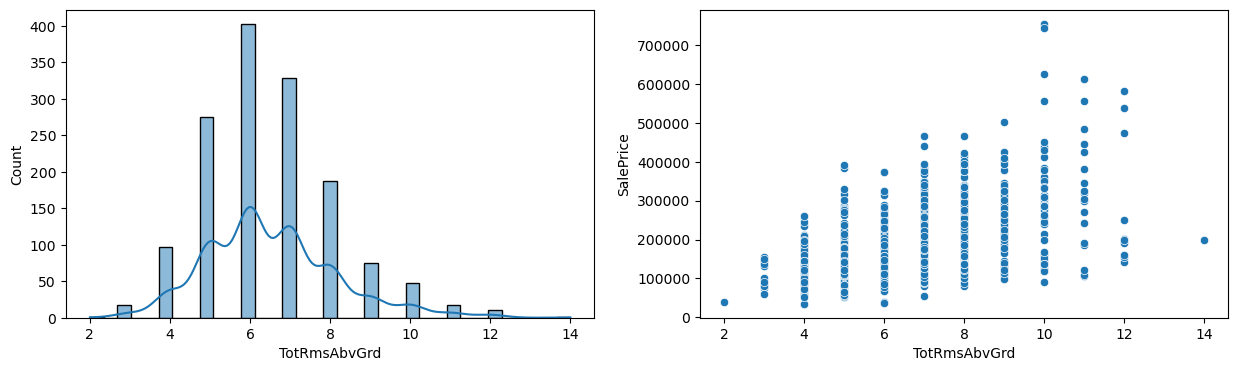

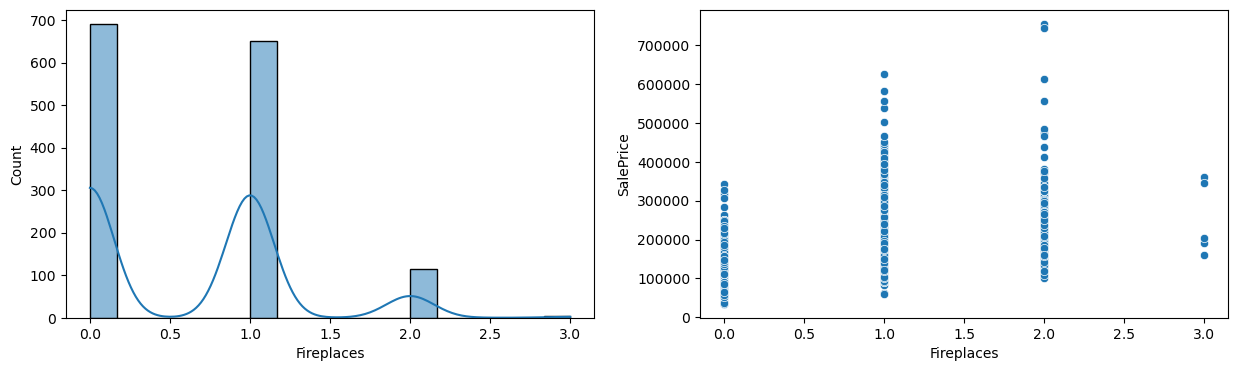

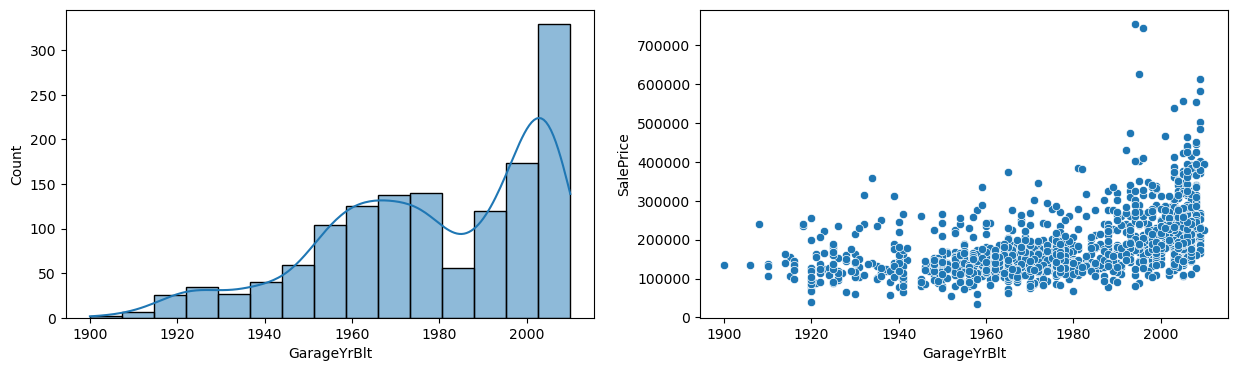

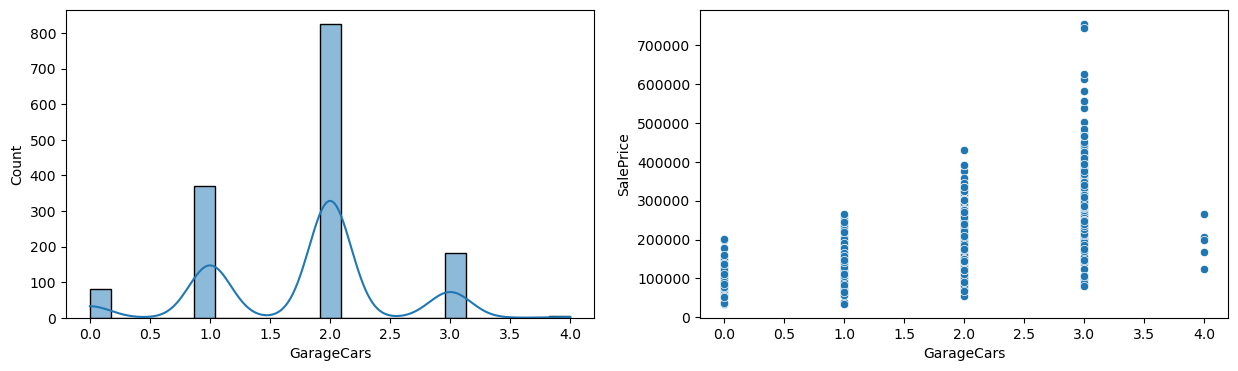

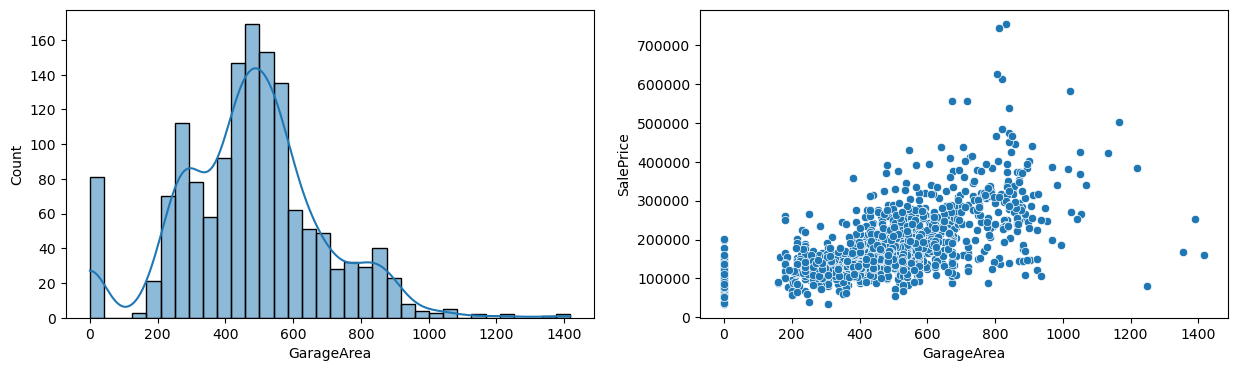

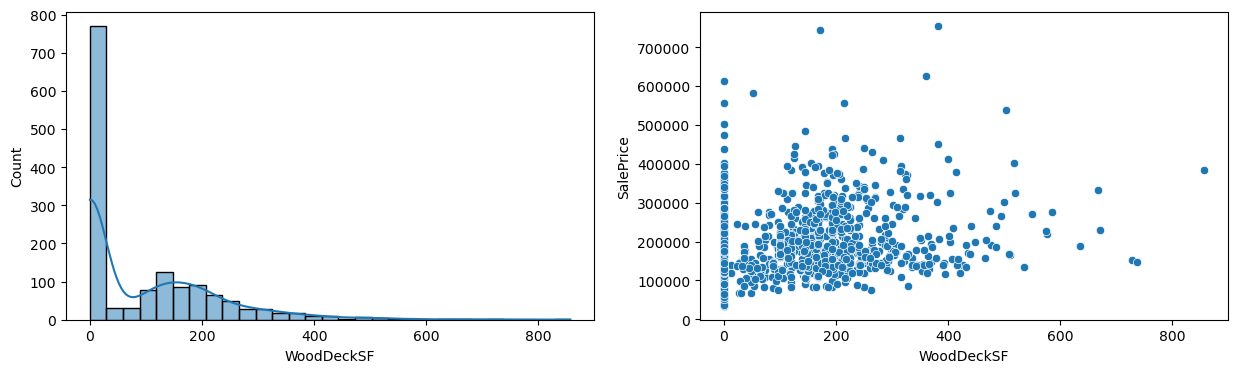

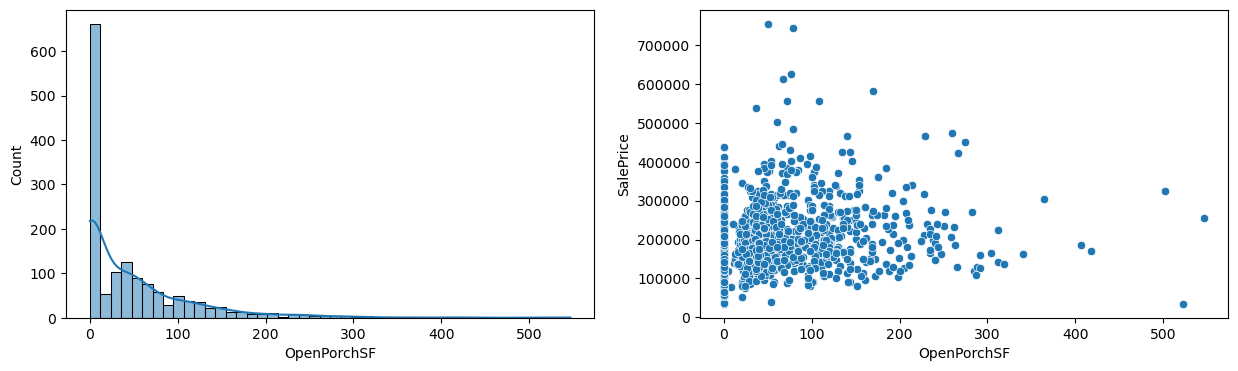

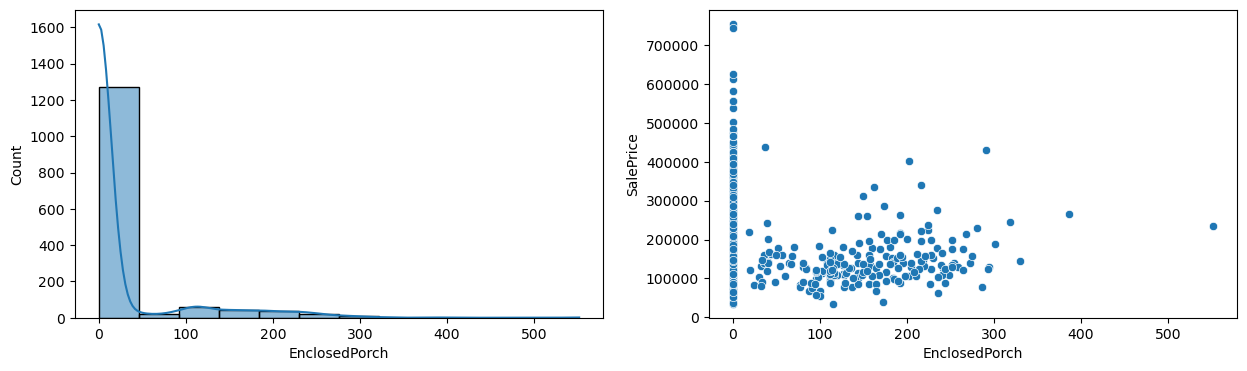

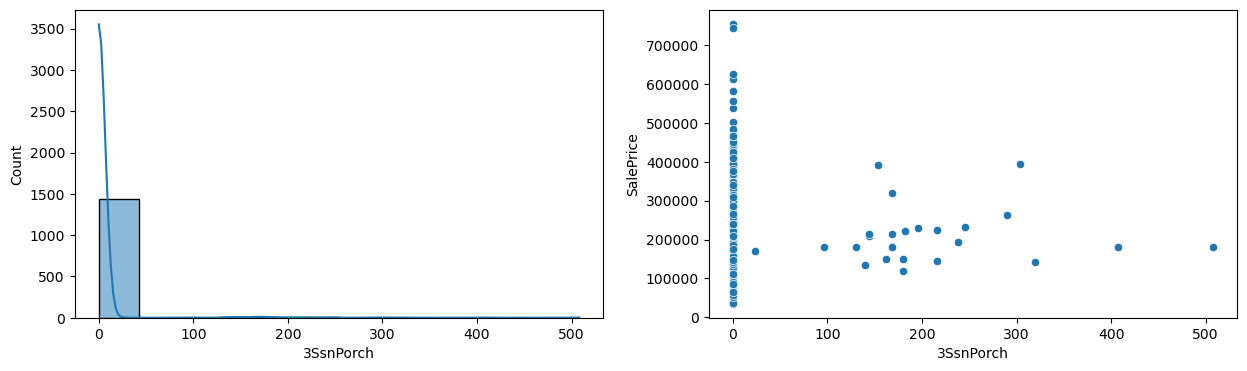

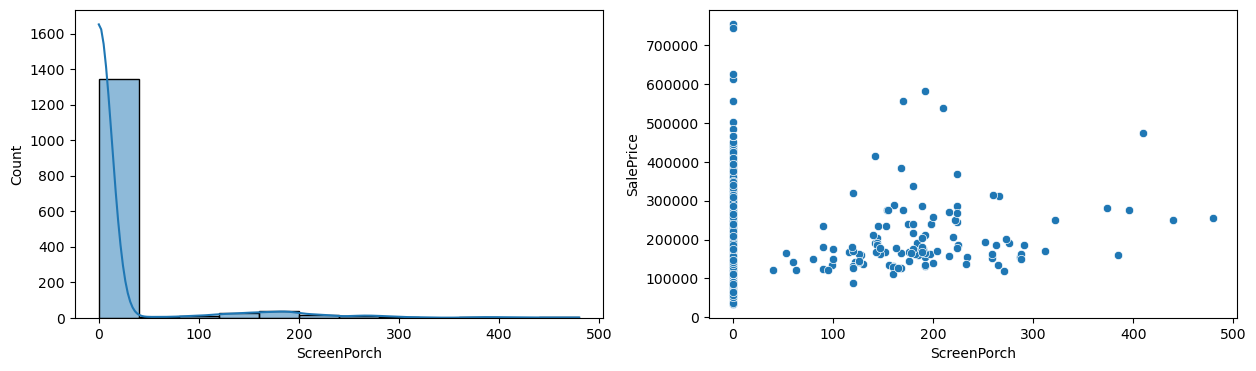

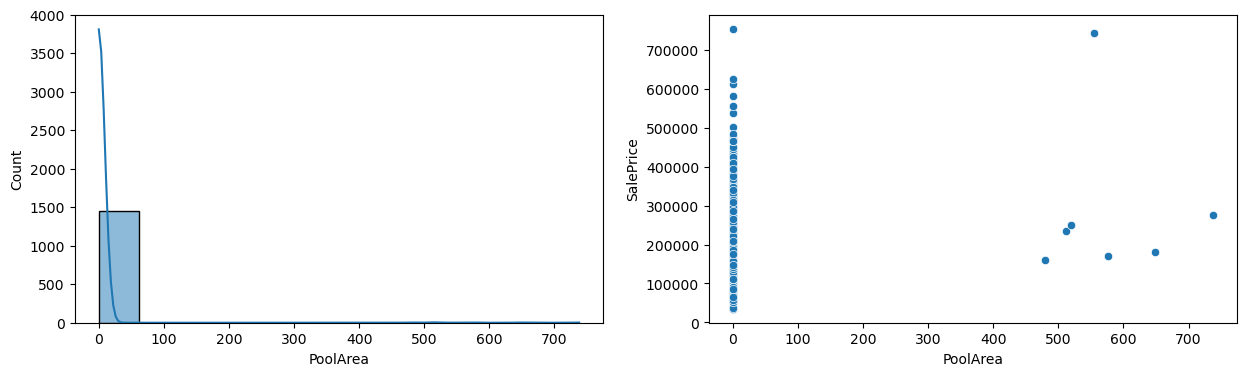

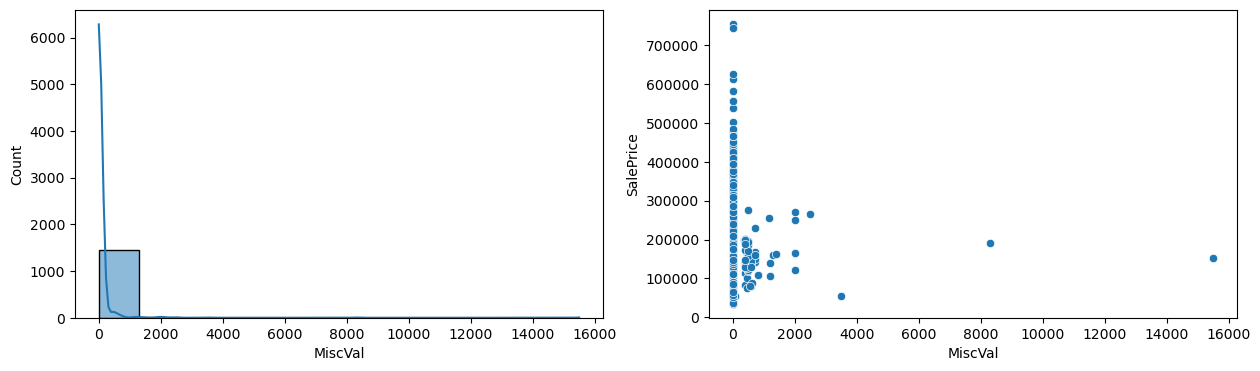

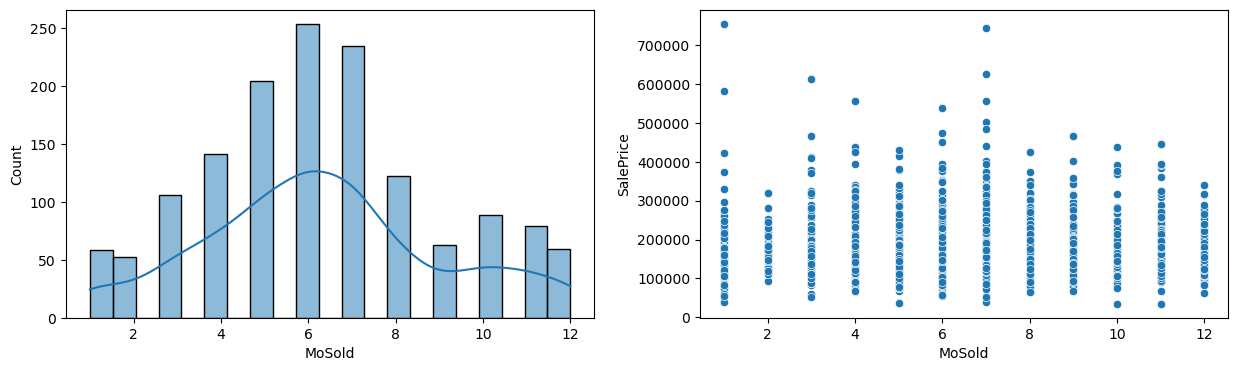

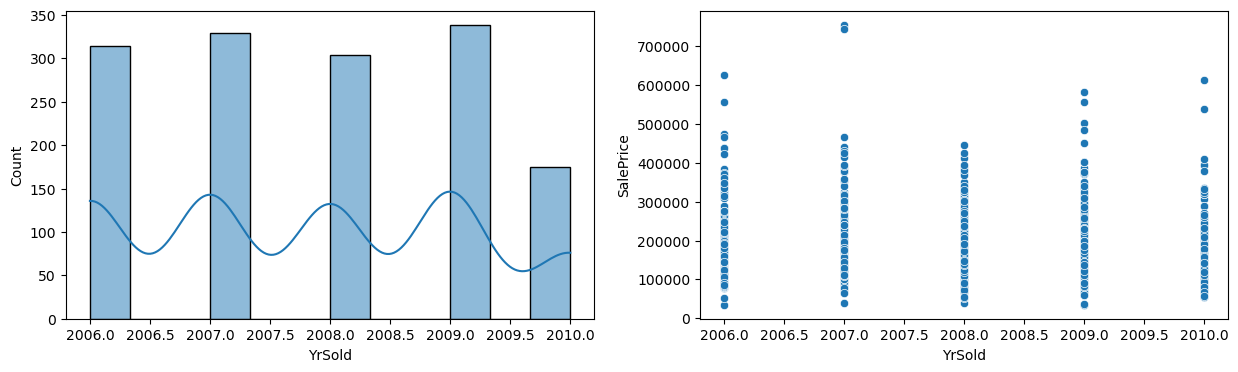

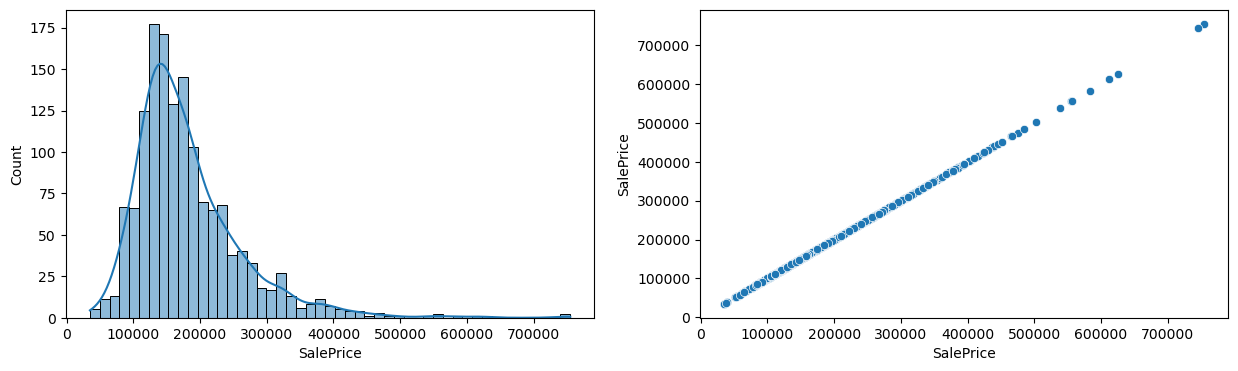

In [19]:
# Creating Distribution of Numerical Features 
for col in numerical_features:
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde = True)
    plt.subplot(1, 2, 2)
    sns.scatterplot(data = df, x = col, y='SalePrice')

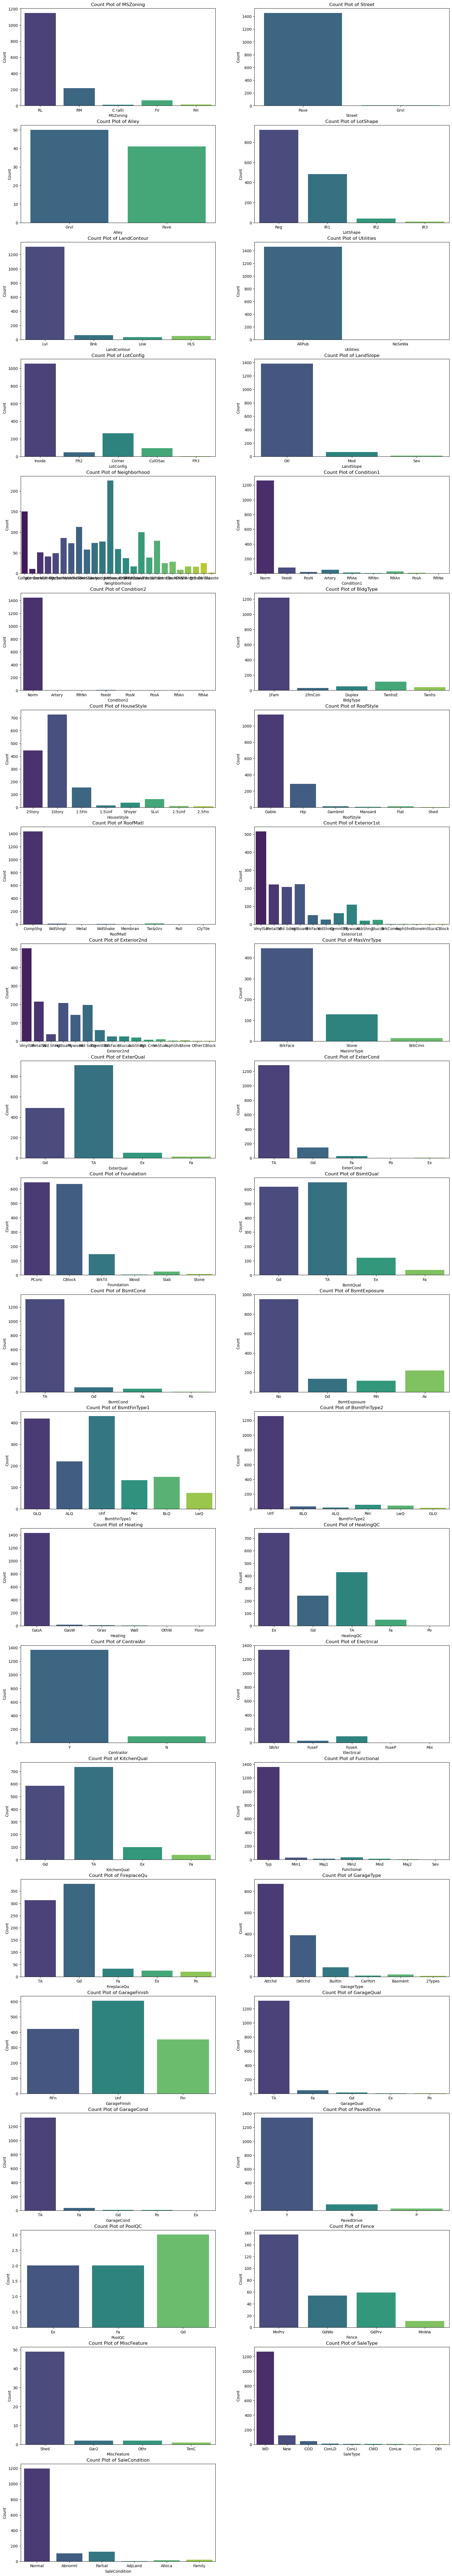

In [21]:
plt.figure(figsize=(20, 120))
for n, feature in enumerate(categorical_features):
    plt.subplot(22, 2, n + 1)
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Average Sale Price')

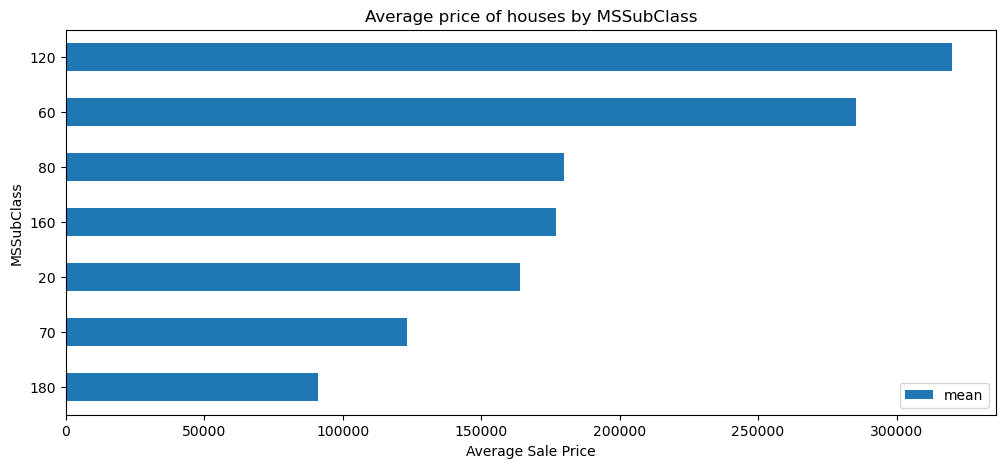

In [22]:
ax = df.query('MSSubClass').groupby('MSSubClass')['SalePrice'].agg(['mean']).sort_values('mean').plot(kind='barh', figsize=(12,5), title=('Average price of houses by MSSubClass'))
ax.set_xlabel('Average Sale Price')

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_10416\4009015088.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

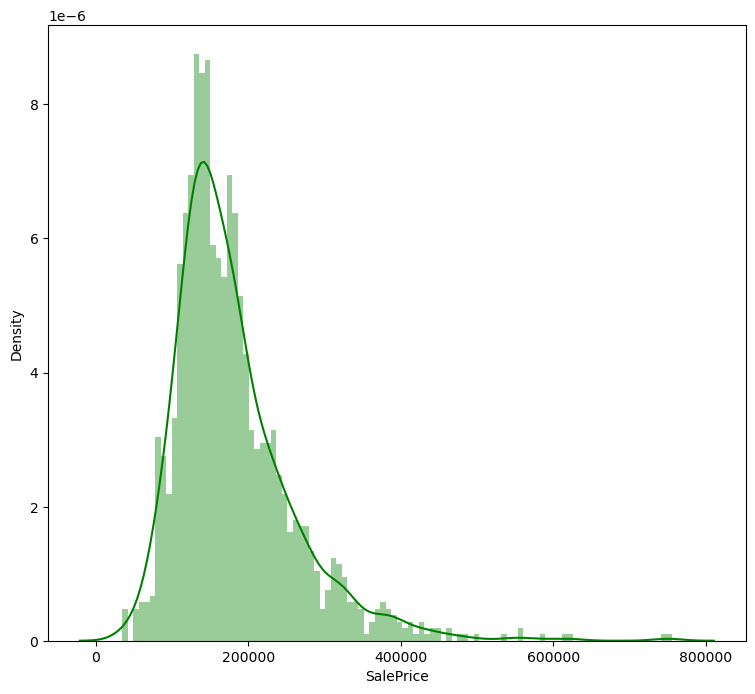

In [23]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [24]:
threshold = 0.40*len(df)
dropped_df = df.copy()
for col in df.columns:
    if dropped_df[col].isnull().sum() > threshold:
        print(f"Dropped column: {col}")
        dropped_df.drop(col,axis=1, inplace=True)

Dropped column: Alley
Dropped column: MasVnrType
Dropped column: FireplaceQu
Dropped column: PoolQC
Dropped column: Fence
Dropped column: MiscFeature


In [25]:
dropped_df.drop('Id', axis=1, inplace=True)

In [26]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

numerical_df = dropped_df.select_dtypes(include=['number'])
outlier_counts = numerical_df.apply(count_outliers)

sorted_outliers = outlier_counts.sort_values(ascending=False)

In [27]:
for column in numerical_df:
    Q1 = dropped_df[column].quantile(0.25)
    Q3 = dropped_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dropped_df[column] = dropped_df[column].mask(dropped_df[column] < lower_bound, lower_bound)
    dropped_df[column] = dropped_df[column].mask(dropped_df[column] > upper_bound, upper_bound)

In [28]:
numerical_with_missing = [feature for feature in numerical_features if total.get(feature, 0) > 0]

categorical_with_missing = [feature for feature in categorical_features if total.get(feature, 0) > 0]

print(f"Number of numerical features with missing values: {len(numerical_with_missing)}")
print(f"Number of categorical features with missing values: {len(categorical_with_missing)}")

Number of numerical features with missing values: 3
Number of categorical features with missing values: 16


In [29]:
for col in dropped_df.select_dtypes(include=['object']):
    dropped_df[col].fillna(dropped_df[col].mode()[0], inplace=True)

In [30]:
dropped_df['GarageYrBlt'].value_counts().head(1)

GarageYrBlt
2005.0    65
Name: count, dtype: int64

In [31]:
dropped_df.GarageYrBlt.fillna(2005.0, inplace=True)

In [32]:
print("Mean = ",dropped_df['LotFrontage'].mean())
print("Median = ",dropped_df['LotFrontage'].median())

Mean =  69.13488759367193
Median =  69.0


In [33]:
dropped_df.LotFrontage.fillna(60.0, inplace=True)

In [34]:
dropped_df['MasVnrArea'].value_counts().head(1)

MasVnrArea
0.0    861
Name: count, dtype: int64

In [35]:
dropped_df.MasVnrArea.fillna(0.0, inplace=True)

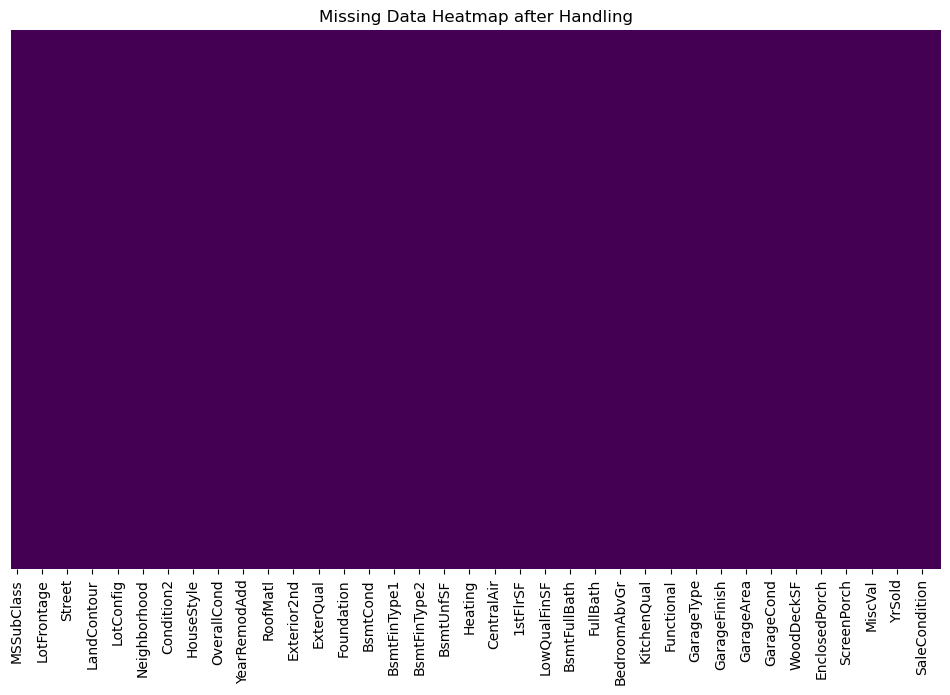

In [36]:
# Visualize any remaining missing data in the 'df' DataFrame after handling missing values
# The heatmap will show where any missing values might still exist, using the 'viridis' colormap.
# 'cbar=False' hides the color bar, and 'yticklabels=False' removes the y-axis labels for clarity.
plt.figure(figsize=(12, 7))
sns.heatmap(dropped_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap after Handling')
plt.show()

In [37]:
dropped_df['HouseAge'] = dropped_df['YrSold'] - dropped_df['YearBuilt']

In [38]:
dropped_df['RemodAge'] = dropped_df['YrSold'] - dropped_df['YearRemodAdd']

In [39]:
dropped_df['TotalBathrooms'] = (dropped_df['FullBath'] + 
                                (0.5 * dropped_df['HalfBath']) + 
                                dropped_df['BsmtFullBath'] + 
                                (0.5 * dropped_df['BsmtHalfBath']))

In [40]:
dropped_df['TotalPorchSF'] = (dropped_df['OpenPorchSF'] + 
                              dropped_df['3SsnPorch'] + 
                              dropped_df['EnclosedPorch'] + 
                              dropped_df['ScreenPorch'] + 
                              dropped_df['WoodDeckSF'])

In [41]:
dropped_df['TotalRooms'] = dropped_df['TotRmsAbvGrd'] + dropped_df['TotalBsmtSF']

In [42]:
dropped_df['TotalBsmnt'] = dropped_df['BsmtFinSF1'] + dropped_df['BsmtFinSF2']

In [43]:
dropped_df['NEW_PorchArea'] = (dropped_df['OpenPorchSF'] + 
                               dropped_df['EnclosedPorch'] + 
                               dropped_df['ScreenPorch'] + 
                               dropped_df['3SsnPorch'] + 
                               dropped_df['WoodDeckSF'])

In [44]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [45]:
columns_to_drop = [
    'YrSold', 'YearBuilt', 'YearRemodAdd',
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
    'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF',
    'TotRmsAbvGrd', 'TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','OpenPorchSF','EnclosedPorch','ScreenPorch','3SsnPorch','WoodDeckSF'
    ,'TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','Street','MiscVal','PoolArea'
]

In [46]:
dropped_df.drop(columns_to_drop, axis=1, inplace=True)
dropped_df.shape

(1460, 59)

In [47]:
df_transformed = pd.get_dummies(dropped_df)
df_transformed.head(2)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0   8450.0            7          5.0       196.0   
1          20         80.0   9600.0            6          7.5         0.0   

   BsmtUnfSF  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  Fireplaces  \
0      150.0             0     1710.0           3.0             1         0.0   
1      284.0             0     1262.0           3.0             1         1.0   

   GarageYrBlt  GarageCars  MoSold  SalePrice  HouseAge  RemodAge  \
0       2003.0         2.0       2   208500.0         5         5   
1       1976.0         2.0       5   181500.0        31        31   

   TotalBathrooms  TotalPorchSF  TotalRooms  TotalBsmnt  NEW_PorchArea  \
0             3.5            61         864       706.0             61   
1             2.0           298        1268       978.0            298   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0             False        False        False         True        False   
1             False        False        False         True        False   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0         False         False         False          True            False   
1         False         False         False          True            False   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_AllPub  \
0            False            False             True              True   
1            False            False             True              True   

   Utilities_NoSeWa  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0             False             False              False          False   
1             False             False              False           True   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  \
0          False              True           True          False   
1          False             False           True          False   

   LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0          False                 False                 False   
1          False                 False                 False   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                False                 False                 False   
1                False                 False                 False   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                  True                 False                 False   
1                 False                 False                 False   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                 False                False                 False   
1                 False                False                 False   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                 False               False                 False   
1                 False               False                 False   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                False                 False                 False   
1                False                 False                 False   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                 False               False                False   
1                 False               False                False   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                 False                 False                 False   
1                 False                 False                 False   

   Neighborhood_Timber  Neighborhood_Veenker  Condition1_Artery  \
0                False                 False              False   
1                False                  True              False   

   Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
0             False             True  

Text(0.5, 1.0, 'Correlation of Numeric and categorical Features with SalePrice')

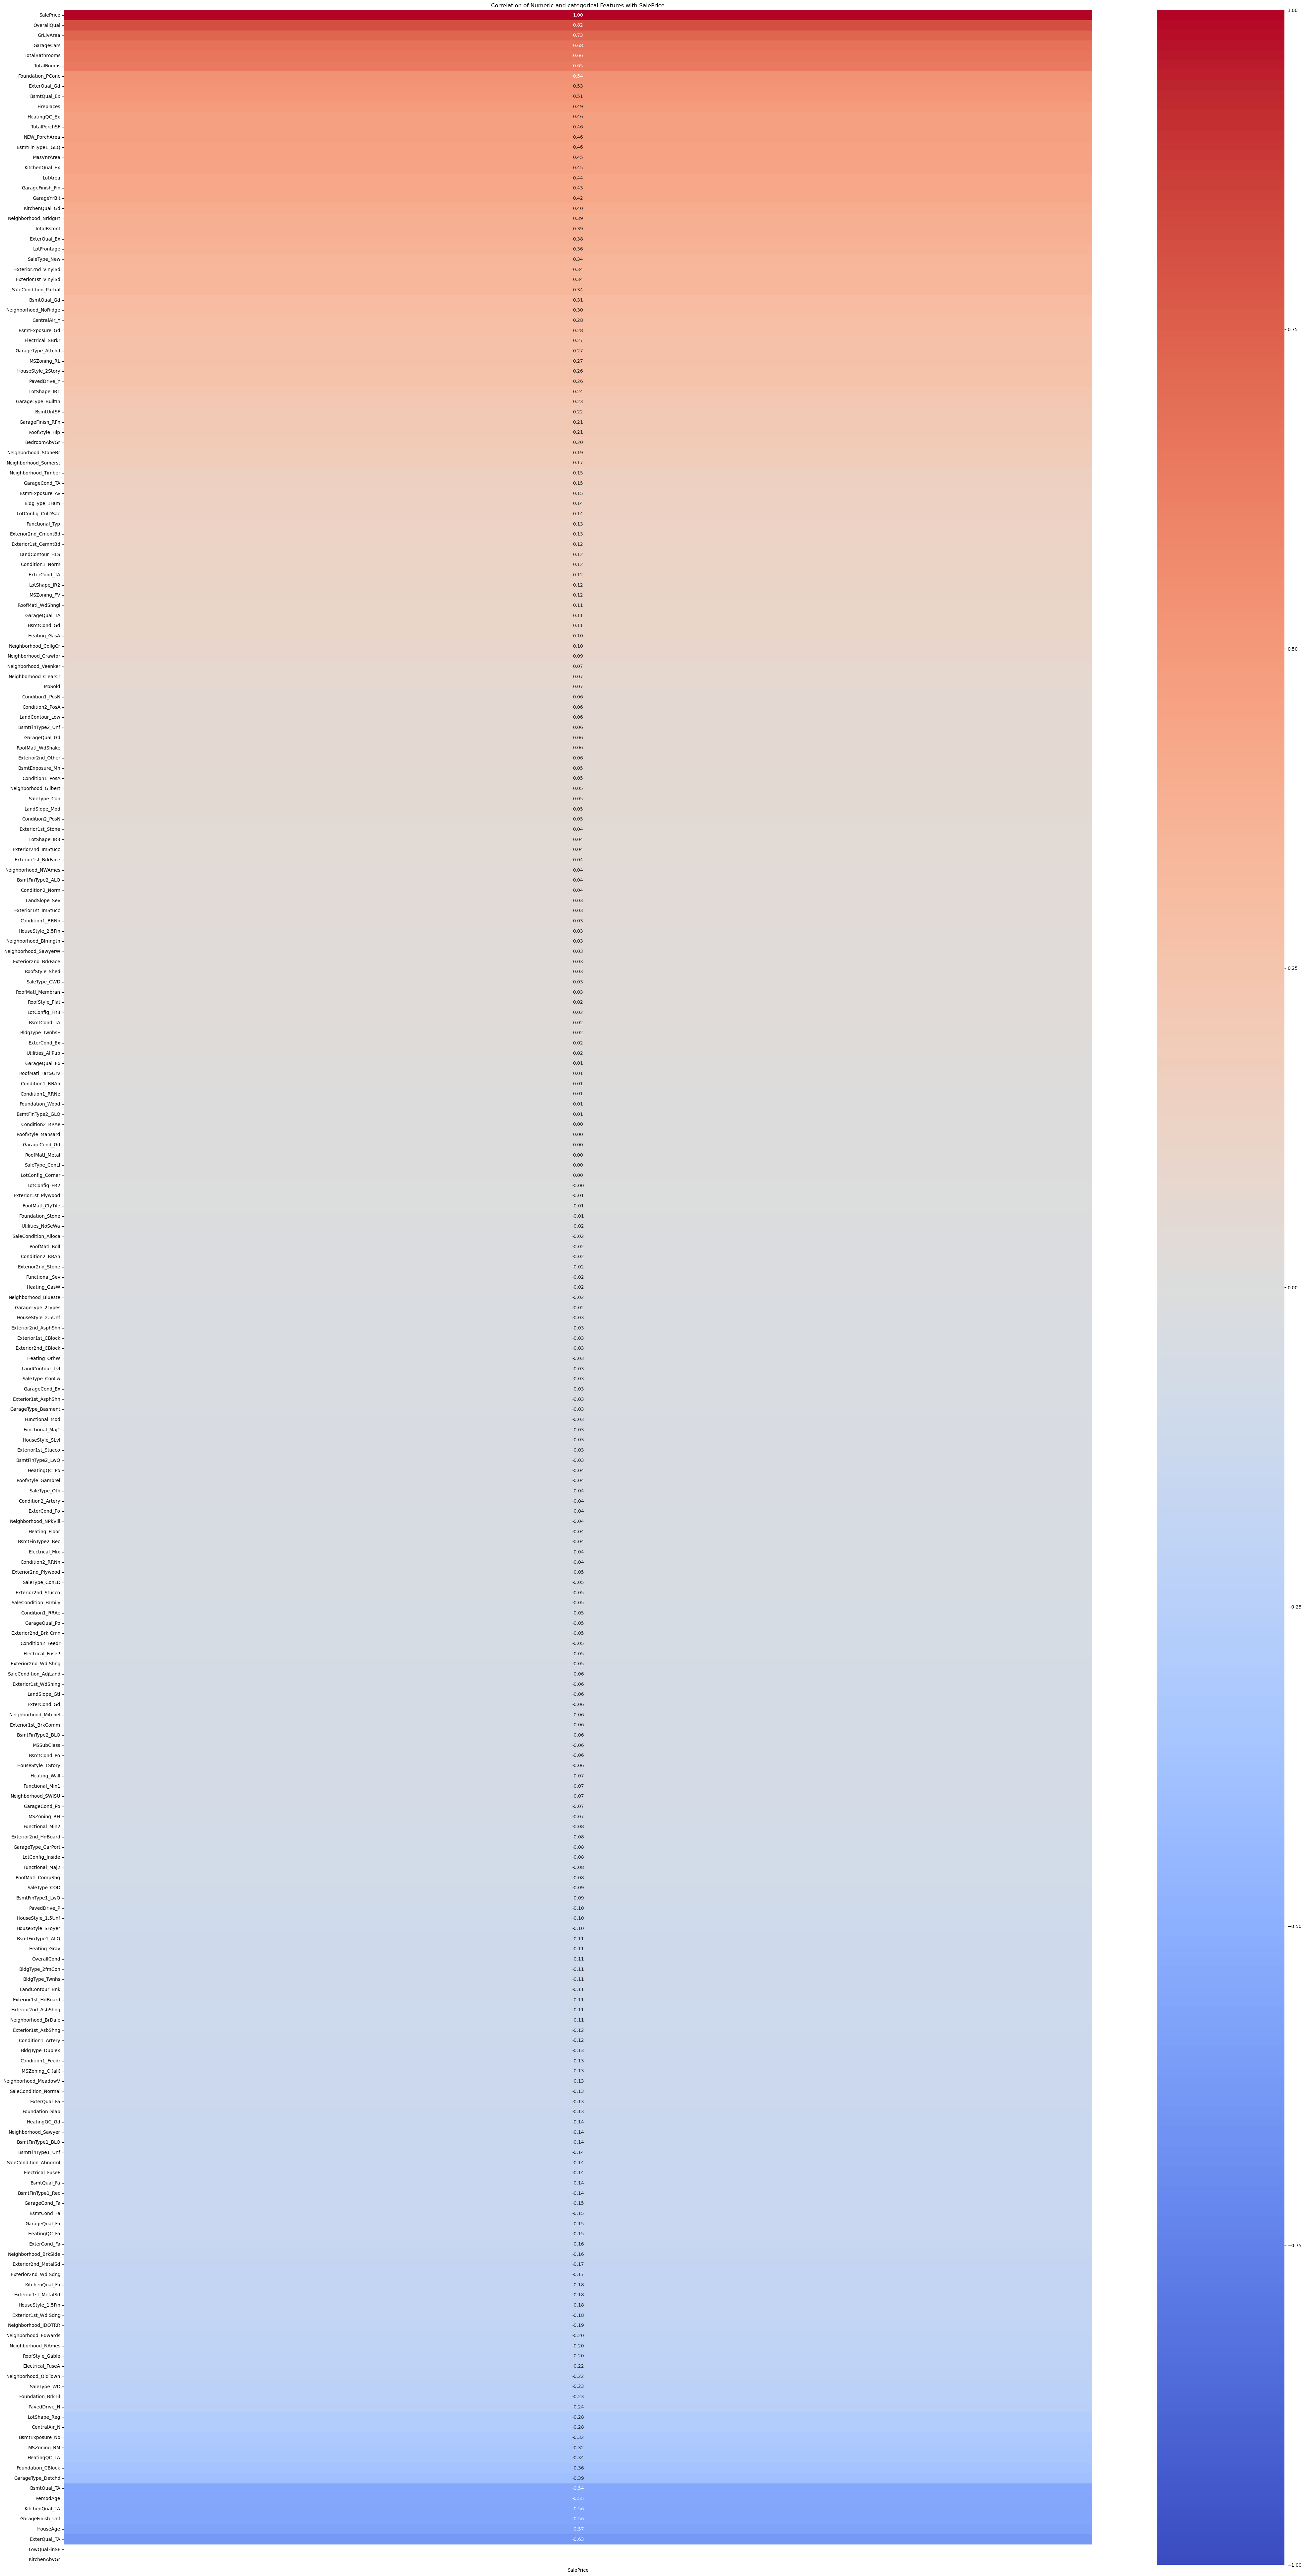

In [48]:
correlations = df_transformed.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
# Plot heatmap of correlations
plt.figure(figsize=(50, 100))
sns.heatmap(
    correlations,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.title('Correlation of Numeric and categorical Features with SalePrice')

C:\Users\user\AppData\Local\Temp\ipykernel_10416\1906789432.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'],color="#1abc9c")
C:\Users\user\AppData\Local\Temp\ipykernel_10416\1906789432.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_transformed['SalePrice'],color="#bb8

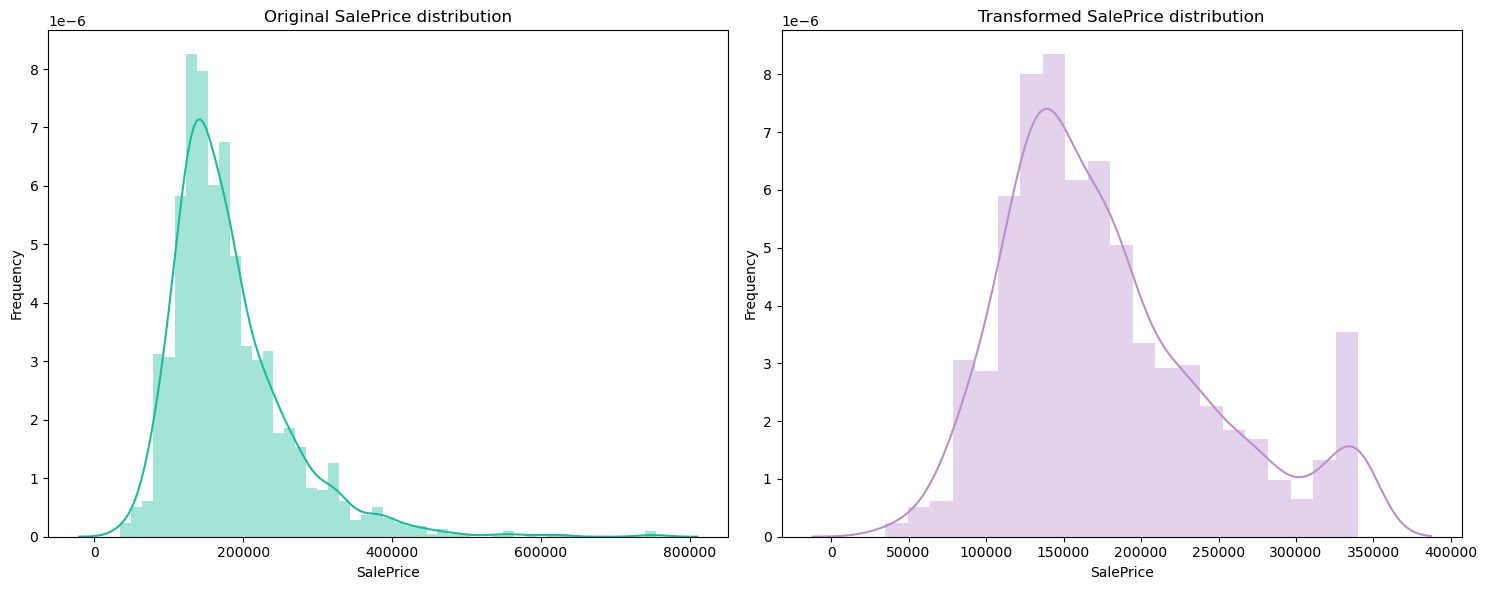

In [49]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.distplot(df['SalePrice'],color="#1abc9c")
plt.title("Original SalePrice distribution" )
plt.xlabel("SalePrice")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(df_transformed['SalePrice'],color="#bb8fce")
plt.title("Transformed SalePrice distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [50]:
X = dropped_df['OverallQual'].values
Y = dropped_df['SalePrice'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [51]:
sc = StandardScaler()
X[:] = sc.fit_transform(X[:])
Y[:] = sc.fit_transform(Y[:])

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,shuffle=True, random_state=42)

In [53]:
print('X_test :',X_test.shape[0])
print('X_train :',X_train.shape[0])
print('y_train :',Y_train.shape[0])
print('y_test :',Y_test.shape[0])

X_test : 438
X_train : 1022
y_train : 1022
y_test : 438


In [54]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [55]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [56]:
print ('Test RMSE is:', sqrt(mean_squared_error(Y_test, y_test_predict)))
print ('Training RMSE is:', sqrt(mean_squared_error(Y_train, y_train_predict)))

Test RMSE is: 0.6980063058114881
Training RMSE is: 0.6945748384930688


In [57]:
test_r2 = r2_score(Y_test, y_test_predict)
train_r2 = r2_score(Y_train, y_train_predict)

print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Training R-squared: 0.5099376649610512
Test R-squared: 0.5294405412017396


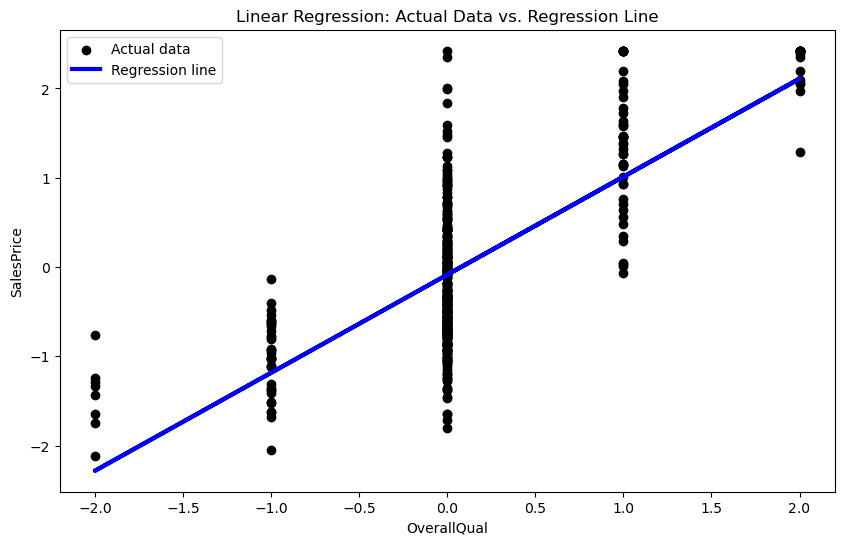

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='black', label='Actual data')
plt.plot(X_test, y_test_predict, color='blue', linewidth=3, label='Regression line')
plt.xlabel('OverallQual')
plt.ylabel('SalesPrice')
plt.title('Linear Regression: Actual Data vs. Regression Line')
plt.legend()
plt.show()

In [59]:
x = dropped_df['GrLivArea'].values
y = dropped_df['SalePrice'].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [60]:
sc = StandardScaler()
x[:] = sc.fit_transform(x[:])
y[:] = sc.fit_transform(y[:])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,shuffle=True, random_state=42)

In [62]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [63]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [64]:
print ('Test RMSE is:', sqrt(mean_squared_error(y_test, y_test_pred)))
print ('Training RMSE is:', sqrt(mean_squared_error(y_train, y_train_pred)))

Test RMSE is: 0.6692692603431414
Training RMSE is: 0.6907048854764568


In [65]:
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Training R-squared: 0.5153833986814839
Test R-squared: 0.567388986098532


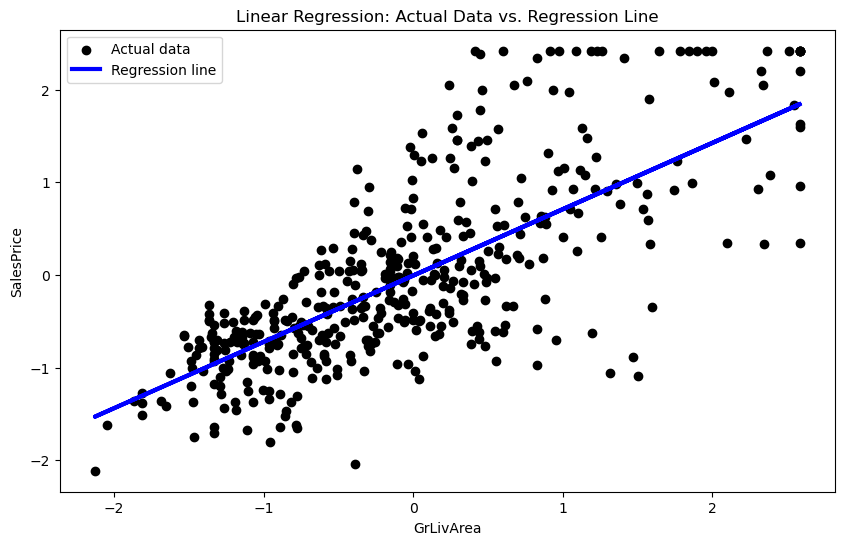

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='black', label='Actual data')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('GrLivArea')
plt.ylabel('SalesPrice')
plt.title('Linear Regression: Actual Data vs. Regression Line')
plt.legend()
plt.show()

In [67]:
X = df_transformed.drop('SalePrice',axis=1)
Y = df_transformed['SalePrice']

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[:] = sc.fit_transform(x[:])
y[:] = sc.fit_transform(y[:])

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

In [70]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [71]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [72]:
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print("RMSE on Trainset:",rmse_train)
print("RMSE on Testset:",rmse_test)

RMSE on Trainset: 15934.65561755118
RMSE on Testset: 269086886.0807361


In [73]:
r2_train = r2_score(Y_train, y_train_predict)
r2_test = r2_score(Y_test, y_test_predict)

print("Training R-squared:", r2_train)
print("Test R-squared:", r2_test)

Training R-squared: 0.9453551348029282
Test R-squared: -17230210.591800787


In [74]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, Y_train)

Ridge()

In [75]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [76]:
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_pred)))
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_pred)))
print("RMSE on Trainset:",rmse_train)
print("RMSE on Testset:",rmse_test)

RMSE on Trainset: 16421.45577772934
RMSE on Testset: 20183.3302904091


In [77]:
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)

print("Training R-squared:", r2_train)
print("Test R-squared:", r2_test)

Training R-squared: 0.9419653585758722
Test R-squared: 0.9030626374564806


In [79]:
test = pd.read_csv(r'C:\Users\user\Downloads\house price prediction\test.csv')

In [80]:
features = ['OverallQual','OverallCond']
X_train = df[features]
X_test = test[features]
y_train = df['SalePrice']

In [81]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [82]:
submission = test[['Id']]
submission['SalePrice'] = predictions 

C:\Users\user\AppData\Local\Temp\ipykernel_10416\618968803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['SalePrice'] = predictions


In [83]:
submission.to_csv("submission.csv",index=False)

In [84]:
submission.shape

(1459, 2)

In [85]:
submission.head()

Id      SalePrice
0  1461  130845.895547
1  1462  176254.328223
2  1463  131215.902091
3  1464  176254.328223
4  1465  267441.200117